# V2 Notebook

# TODOs:

### Searchsploit
### Full auto cross tool URL collection and traversal
### 'IP Forwarded By' hiding

https://eightytwo.net/blog/brute-forcing-the-admin-password-on-nibbles/

In [1]:
from web_footprinting_utils import setup_ipython

get_ipython, INTERACTIVE = setup_ipython()

In [2]:
%env TARGET=10.10.28.39
%env PORT=9999

env: TARGET=10.10.28.39
env: PORT=9999


In [3]:
import os 

port = os.environ['PORT']
target_site = os.environ['TARGET']
!ping -c 5 $TARGET

PING 10.10.28.39 (10.10.28.39) 56(84) bytes of data.

--- 10.10.28.39 ping statistics ---
5 packets transmitted, 0 received, 100% packet loss, time 4083ms



In [4]:
from web_footprinting_utils import WebsiteRecord, LinkRecorder

record = WebsiteRecord(target_site, directory="", port=port)

fingerprinting http://10.10.28.39:9999


Whatweb:
ERROR Opening: http://10.10.28.39:9999 - uninitialized constant #<Class:ExtendedHTTPResponse>::HTTPBadResponse


Ffuf:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.28.39:9999/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 10
 :: Threads          : 50
 :: Matcher          : Response status: 200,204,301,302,307,401,403,405
________________________________________________

:: Progress: [4614/4614]

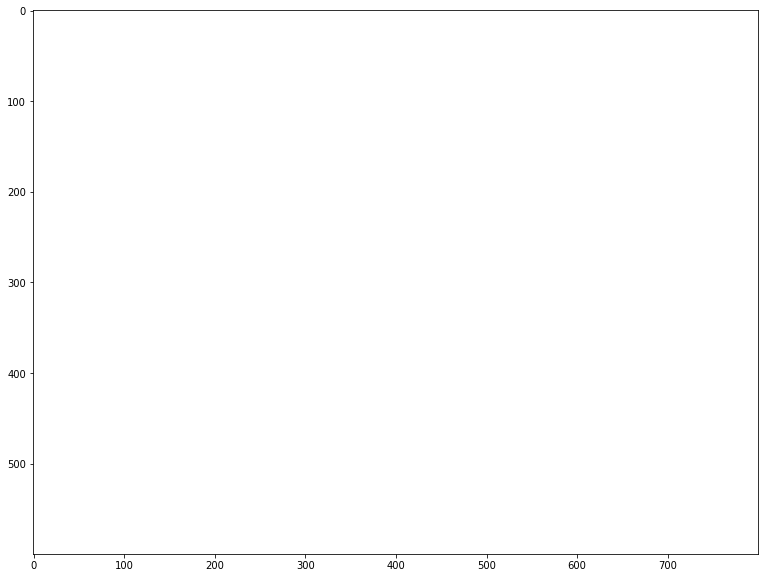

In [5]:
%matplotlib inline
results = record.fingerprint_page()

In [6]:
record.fingerprint_extended()



Ffuf Extensions:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.28.39:9999/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Extensions       : .asp .aspx .bat .c .cfm .cgi .com .dll .exe .htm .html .inc .jhtml .jsa .jsp .log .mdb .nsf .php .phtml .pl .reg .sh .shtml .sql .txt .xml / 
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 5
 :: Threads          : 120
 :: Matcher          : Response status: 200,204,301,302,307,401,403,405
________________________________________________

:: Progre

# Main Checks Complete!

In [7]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/root/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5298/3417071707.py", line 2, in <module>
    record_alt = WebsiteRecord(target_site, directory="/blog", port=80)
  File "/root/ctf-notebooks/web_footprinting_utils.py", line 89, in __init__
    self.driver = webdriver.Chrome(chrome_options=options, executable_path=os.path.join(os.getcwd(), "chromedriver"))
  File "/root/miniconda/lib/python3.9/site-packages/selenium/webdriver/chrome/webdriver.py", line 73, in __init__
    self.service.start()
  File "/root/miniconda/lib/python3.9/site-packages/selenium/webdriver/common/service.py", line 102, in start
    time.sleep(1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/miniconda/lib/python3.9/site-packages/IPython/core/interactiveshel

TypeError: object of type 'NoneType' has no len()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins/akismet", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
from web_footprinting_utils import save_notebook

save_notebook()

In [ ]:
if INTERACTIVE:
    !jupyter nbconvert --to script "3_Web_Footprinting_V2.ipynb"